## price predictor


In [1]:
import pandas as pd

In [2]:
housing =pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,15))

## Train-Test splitting

In [10]:
import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#train_set,test_set=split_train_test(housing,0.2)

In [12]:
#print(f"rows in train: {len(train_set)}\nrows in test: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train: {len(train_set)}\nrows in test: {len(test_set)}\n")

rows in train: 404
rows in test: 102



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]



In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## correlations

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

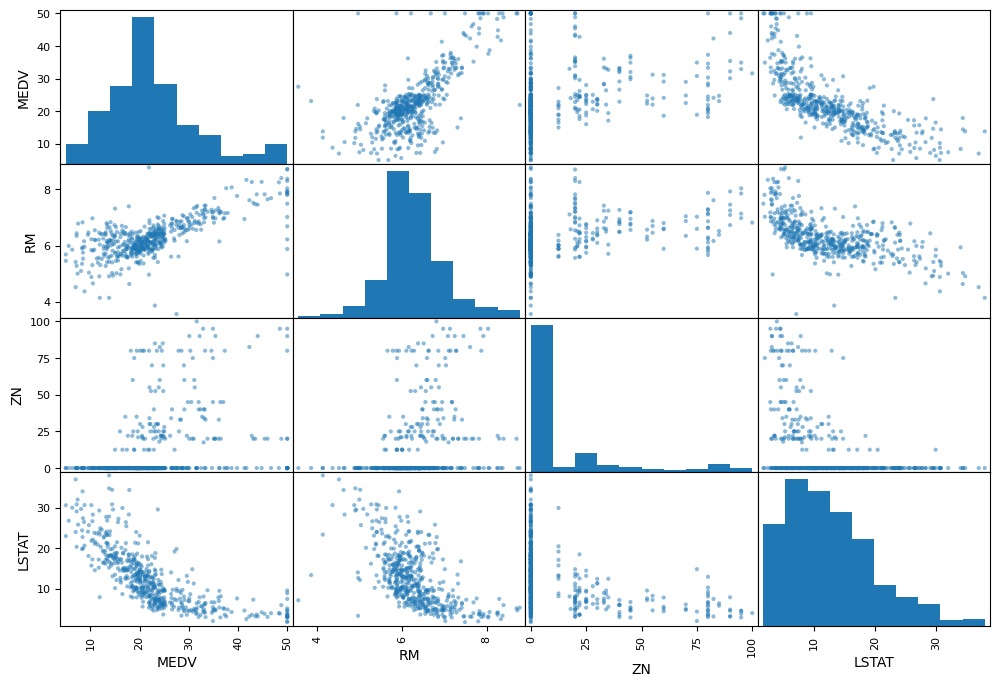

In [18]:
from pandas.plotting import scatter_matrix
attr = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attr],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

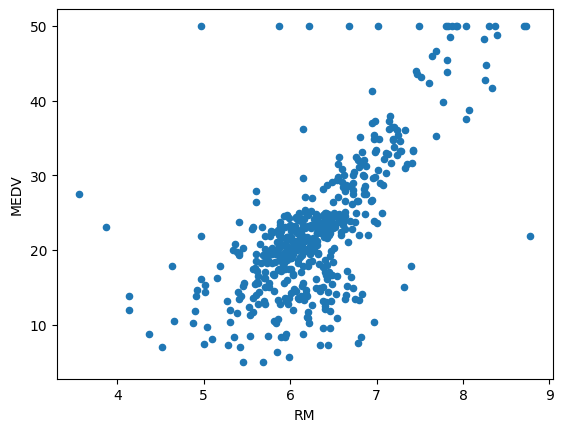

In [19]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=1)

In [20]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## trying attribute combinations

In [21]:
# housing["TAXRM"]=housing['TAX']/housing['RM']
# housing.head()

In [22]:
corr_matrix = housing.corr()
#corr_matrix['MEDV'].sort_values(ascending=False)

# scikit-learn design

primarly, three types of objects
1. Estimators - it estimates some parameter based on dataset. eg: imputer it has a fit method and transform method. Fit method - fits the dataset and calculates internal parameters

2. Transformers - takes input and returns output based on the learning from fit(). it also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor.  fit() and predit() are two common functions. it also gives score function which will evaluate the predictions.

## feature scaling

primarily,two types of features scaling methods:
1. min-max scaling (normalizaion)
    (value-min)/(max-min)
    sklearn provides a class called MinMaxScaler for this 
    
2. standardization
    (value-mean)/std
    sklearn provides a class called StandardScaler for this

## creating a pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [24]:
housing_num = my_pipeline.fit_transform(housing)

In [25]:
housing.shape


(404, 13)

## selecting model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num,housing_labels)

RandomForestRegressor()

In [27]:
some_data = housing.iloc[:5]

In [28]:
some_lables = housing_labels.iloc[:5]

In [29]:
prepared_data = my_pipeline.transform(some_data)

In [30]:
model.predict(prepared_data)

array([22.511, 25.145, 16.466, 23.368, 23.485])

In [31]:
list(some_lables)


[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model





In [32]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [33]:
rmse


1.2102838458906073

## using better evaluation technique - cross validation

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [35]:
rmse_scores

array([2.791547  , 2.99967304, 4.46549232, 2.53659768, 3.43284134,
       2.55107241, 4.71801376, 3.27741154, 3.26431405, 3.38280312])

In [36]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("std dev:",scores.std())

In [37]:
print_scores(rmse_scores)

scores: [2.791547   2.99967304 4.46549232 2.53659768 3.43284134 2.55107241
 4.71801376 3.27741154 3.26431405 3.38280312]
mean: 3.3419766259288033
std dev: 0.6978680592690633


## saving the model

In [38]:
from joblib import dump,load
dump(model,'dragon.joblib')

['dragon.joblib']

## testing 

In [43]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.961 11.601 25.503 22.204 18.599 14.842 20.364 14.573 33.379 40.627
 19.565 12.188 25.071 27.009 19.559 10.987 32.128 14.341 23.51  19.878
 19.852 17.824 16.756 22.037 17.917 31.115 16.09  33.038  8.857 34.286
 23.974 20.977 23.332 10.839 21.007 11.488 42.965 24.359 23.695 41.775
 24.253 29.661 20.402 20.791 18.647 32.934 44.403 20.077 20.148 21.643
 20.848 14.504 21.539 15.171 24.816 33.127 41.714 28.782 18.871 20.6
 46.597  9.781 18.943 25.635 14.969 33.022 19.989 18.479 19.107 34.618
 25.902 23.034 21.498 22.129 35.023 12.857 15.885 19.932 20.738 21.347
 22.602 21.234 13.932 23.273 20.647 21.189 13.704 20.779 22.225 23.24
 18.653 27.184  7.006 26.385 19.201 29.282 20.188 31.12  14.465 26.698
 20.967 20.369] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4

In [41]:
final_rmse

2.8857239737960336

In [44]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using model

In [47]:
from joblib import dump,load
import numpy as np
model = load('dragon.joblib')
input = np.array([[0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98]])
model.predict(input)

array([21.893])